# Demostration to ensemble models

# Reading about ensemble models:

1. Flatch, Machine Learning, 11.*  
2. http://www.machinelearning.ru/wiki/index.php?title=Бэггинг  
3. http://www.machinelearning.ru/wiki/index.php?title=Бустинг   
4. https://alexanderdyakonov.wordpress.com/2017/03/10/c%D1%82%D0%B5%D0%BA%D0%B8%D0%BD%D0%B3-stacking-%D0%B8-%D0%B1%D0%BB%D0%B5%D0%BD%D0%B4%D0%B8%D0%BD%D0%B3-blending  
5. Kuhn, Applied Predictive Modeling, 8.*

pip install xgboost

In [5]:
import xgboost as xgb

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor


%pylab inline

SEED = 3

Populating the interactive namespace from numpy and matplotlib


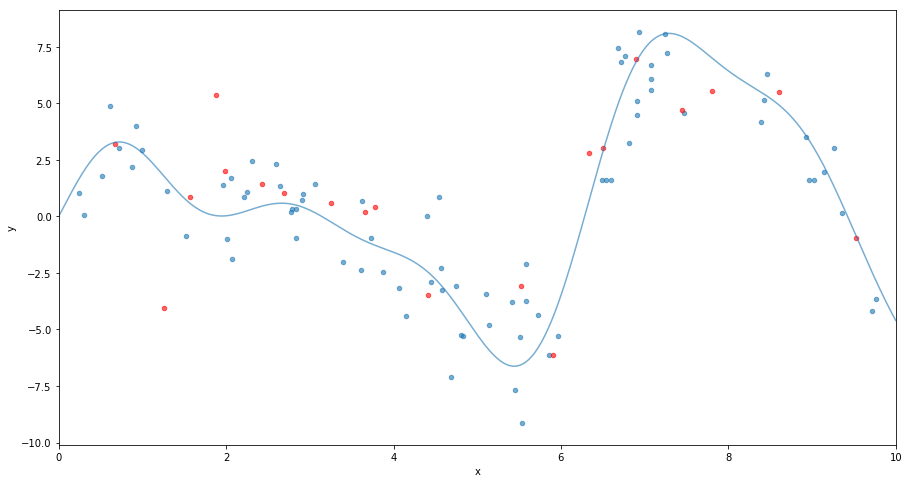

In [18]:
ground_truth = lambda x: x*np.sin(x) + 2 * np.sin(2*x) + np.sin(3*x)

def sample_data(n_samples=200):
    """generate training and testing data"""
    np.random.seed(SEED)
    X = np.random.uniform(0, 10, size=n_samples)
    y = ground_truth(X.ravel()) + np.random.normal(scale=2, size=n_samples)
    
    return train_test_split(X.reshape(-1,1), y, test_size=0.2, random_state=SEED)

def plot_data(alpha=0.6, s=20):
    plt.figure(figsize=(15, 8))
    plt.plot(x_plot, ground_truth(x_plot), alpha=alpha, label='ground truth')

    # plot training and testing data
    plt.scatter(X_train, y_train, s=s, alpha=alpha)
    plt.scatter(X_test, y_test, s=s, alpha=alpha, color='red')
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('x')
    
annotation_kw = {'xycoords': 'data', 'textcoords': 'data',
                 'arrowprops': {'arrowstyle': '->', 'connectionstyle': 'arc'}}

X_train, X_test, y_train, y_test = sample_data(100)
x_plot = np.linspace(0, 10, 500)     
plot_data()

### Simple Decision trees

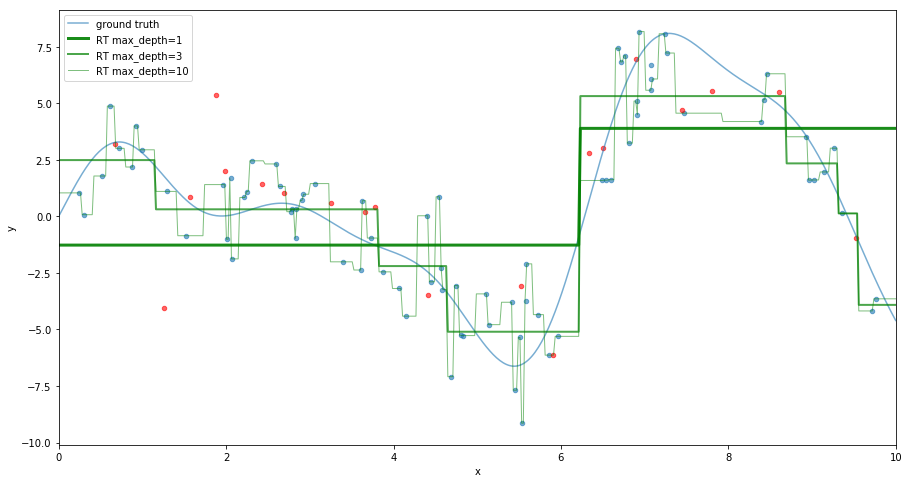

In [20]:
plot_data()

est = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)
x_pred_1 = est.predict(x_plot.reshape(-1,1))
plt.plot(x_plot, x_pred_1, label='RT max_depth=1', 
         color='g', alpha=0.9, linewidth=3)

est = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot.reshape(-1,1)),
         label='RT max_depth=3', color='g', alpha=0.7, linewidth=2)

est = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot.reshape(-1,1)),
         label='RT max_depth=10', color='g', alpha=0.5, linewidth=1)


plt.legend(loc='upper left')

### Random Forest

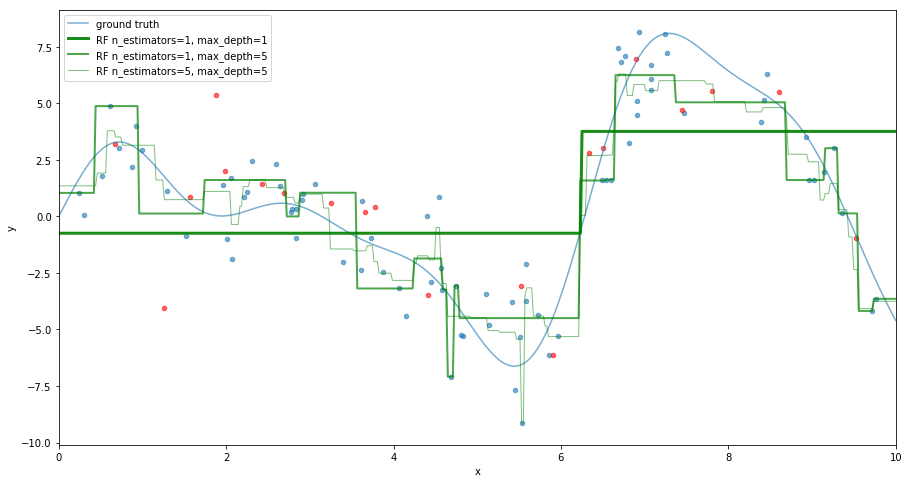

In [22]:
plot_data()

est = RandomForestRegressor(n_estimators=1, max_depth=1).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='RF n_estimators=1, max_depth=1', color='g', alpha=0.9, linewidth=3)

est = RandomForestRegressor(n_estimators=1, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='RF n_estimators=1, max_depth=5', color='g', alpha=0.7, linewidth=2)

est = RandomForestRegressor(n_estimators=5, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='RF n_estimators=5, max_depth=5', color='g', alpha=0.5, linewidth=1)


plt.legend(loc='upper left')

### Gradient boosting

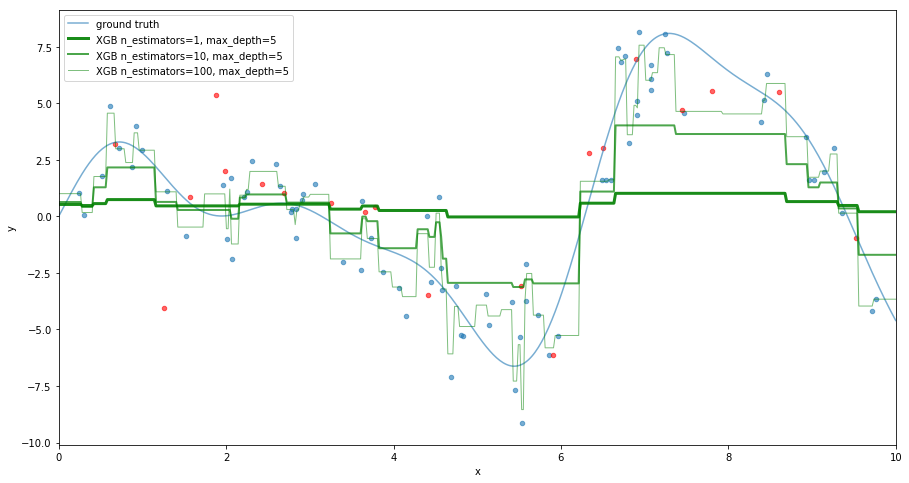

In [23]:
plot_data()

est = xgb.XGBRegressor(n_estimators=1, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='XGB n_estimators=1, max_depth=5', color='g', alpha=0.9, linewidth=3)

est = xgb.XGBRegressor(n_estimators=10, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='XGB n_estimators=10, max_depth=5', color='g', alpha=0.7, linewidth=2)

est = xgb.XGBRegressor(n_estimators=100, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='XGB n_estimators=100, max_depth=5', color='g', alpha=0.5, linewidth=1)


plt.legend(loc='upper left')

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, IntSlider, FloatSlider

n_estimators_slider = IntSlider(min=1, max=1000, step=20, value=30)
max_depth_slider = IntSlider(min=1, max=15, step=1, value=3)
learning_rate_slider = FloatSlider(min=0.01, max=0.3, step=0.01, value=0.1)
subsample_slider = FloatSlider(min=0.1, max=1, step=0.1, value=1.0)


@interact(n_estimators=n_estimators_slider, 
          max_depth=max_depth_slider, 
          learning_rate=learning_rate_slider,\
         subsample=subsample_slider)


def plot(n_estimators, max_depth, learning_rate, subsample):
    est = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, \
                           subsample=subsample).fit(X_train, y_train)

    plot_data()
    plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), \
             label='XGB n_estimators={0}, max_depth={1}, learning_rate={2}, subsample={3}'.format(n_estimators, max_depth, learning_rate, subsample),\
             color='g', alpha=0.9, linewidth=len(params)-i)
    
    plt.legend(loc='upper left')

interactive(children=(IntSlider(value=30, description='n_estimators', max=1000, min=1, step=20), IntSlider(value=3, description='max_depth', max=15, min=1), FloatSlider(value=0.1, description='learning_rate', max=0.3, min=0.01, step=0.01), FloatSlider(value=1.0, description='subsample', max=1.0, min=0.1), Output()), _dom_classes=('widget-interact',))